In [1]:
import statsmodels.formula.api as smf
import wooldridge as woo
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
mlb = woo.data('mlb1')

In [3]:
mlb

,salary,teamsal,nl,years,games,atbats,runs,hits,doubles,triples,...,runsyr,percwhte,percblck,perchisp,blckpb,hispph,whtepw,blckph,hisppb,lsalary
0,6329213.0,38407380.0,1,12,1705,6705,1076,1939,320,67,...,89.666664,70.277969,18.844229,10.877804,0.000000,0.000000,70.277969,0.000000,0.000000,15.660686
1,3375000.0,38407380.0,1,8,918,3333,407,863,156,38,...,50.875000,70.277969,18.844229,10.877804,18.844229,0.000000,0.000000,10.877804,0.000000,15.031906
2,3100000.0,38407380.0,1,5,751,2807,370,840,148,18,...,74.000000,70.277969,18.844229,10.877804,0.000000,0.000000,70.277969,0.000000,0.000000,14.946913
3,2900000.0,38407380.0,1,8,1056,3337,405,816,143,18,...,50.625000,70.277969,18.844229,10.877804,0.000000,0.000000,70.277969,0.000000,0.000000,14.880221
4,1650000.0,38407380.0,1,12,1196,3603,437,928,19,16,...,36.416668,70.277969,18.844229,10.877804,18.844229,0.000000,0.000000,10.877804,0.000000,14.316286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,312000.0,35586456.0,0,5,439,1098,150,260,41,8,...,30.000000,73.149635,13.871621,12.978746,0.000000,0.000000,73.149635,0.000000,0.000000,12.650759
349,275000.0,35586456.0,0,2,211,700,63,183,32,1,...,31.500000,73.149635,13.871621,12.978746,0.000000,12.978746,0.000000,0.000000,13.871621,12.524527
350,250000.0,35586456.0,0,3,249,828,112,176,36,2,...,37.333332,73.149635,13.871621,12.978746,0.000000,0.000000,73.149635,0.000000,0.000000,12.429216
351,200000.0,35586456.0,0,6,667,2087,217,510,92,5,...,36.166668,73.149635,13.871621,12.978746,0.000000,0.000000,73.149635,0.000000,0.000000,12.206073


In [7]:
result = smf.ols("np.log(salary) ~ years + gamesyr + bavg + hrunsyr +rbisyr", data = mlb).fit()

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     117.1
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           2.94e-72
Time:                        12:32:49   Log-Likelihood:                -385.11
No. Observations:                 353   AIC:                             782.2
Df Residuals:                     347   BIC:                             805.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1924      0.289     38.752      0.000      10.624      11.760
years          0.0689      0.012      5.684      0.000       0.045       0.093
gamesyr        0.0126      0.003      4.742      0.000       0.007       0.018
bavg           0.0010      0.001      0.887      0.376      -0.001       0.003
hrunsyr        0.0144      0.016      0.899      0.369      -0.017       0.046
rbisyr         0.0108      0.007      1.500      0.134      -0.003       0.025
==============================================================================
Omnibus:                        6.816   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.033   Jarque-Bera (JB):               10.197
Skew:                          -0.068   Prob(JB):                      0.00610
Kurtosis:                       3.821   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import patsy as pt
import statsmodels.stats.outliers_influence as smo

# Get the design matrix
y, X = pt.dmatrices("np.log(salary) ~ years + gamesyr + bavg + hrunsyr +rbisyr", data = mlb,
                   return_type = 'dataframe')

X

,Intercept,years,gamesyr,bavg,hrunsyr,rbisyr
0,1.0,12.0,142.083328,289.0,19.250000,69.666664
1,1.0,8.0,114.750000,259.0,9.125000,42.750000
2,1.0,5.0,150.199997,299.0,9.200000,71.000000
3,1.0,8.0,132.000000,245.0,13.375000,52.625000
4,1.0,12.0,99.666664,258.0,10.333333,45.083332
...,...,...,...,...,...,...
348,1.0,5.0,87.800003,237.0,1.200000,16.600000
349,1.0,2.0,105.500000,261.0,5.500000,32.000000
350,1.0,3.0,83.000000,213.0,13.666667,36.666668
351,1.0,6.0,111.166664,244.0,2.166667,28.000000


In [29]:
X.shape

(353, 6)

In [11]:
#  Pull the number of regressors (+ intercept)
k = X.shape[1]

# create an empty matrix to store results
VIF = np.empty(k)

# Loop for each regressor (+ intercept)
for i in range(k):
    
    # calculate the VIF for each
    VIF[i] = smo.variance_inflation_factor(X.values, i)

print('VIF:', VIF)

VIF: [55.77945135  1.47329023  6.0982434   1.19867031  7.94201936 17.88887377]


In [30]:
hypotheses = ['bavg = 0', 'hrunsyr = 0', 'rbisyr = 0']
result.f_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=9.550253521951928, p=4.4737081398387465e-06, df_denom=347, df_num=3>

## Ex 2

In [12]:
house = woo.data('hprice1')

In [13]:
house

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630
...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.299988,3,6056.0,1837,1,5.686975,5.762994,8.708805,7.515889
84,236.0,259.399994,3,5828.0,1715,0,5.463832,5.558371,8.670429,7.447168
85,202.5,258.100006,3,6341.0,1574,0,5.310740,5.553347,8.754792,7.361375
86,219.0,232.000000,2,6362.0,1185,0,5.389072,5.446737,8.758098,7.077498


In [16]:
results2 = smf.ols('price ~ lotsize + sqrft +bdrms', data = house).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           2.70e-20
Time:                        12:42:56   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.462     -80.385      36.844
lotsize        0.0021      0.001      3.220      0.002       0.001       0.003
sqrft          0.1228      0.013      9.275      0.000       0.096       0.149
bdrms         13.8525      9.010      1.537      0.128      -4.065      31.770
==============================================================================
Omnibus:                       20.398   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.278
Skew:                           0.961   Prob(JB):                     9.79e-08
Kurtosis:                       5.261   Cond. No.                     6.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# statsmodels method
reset_out = smo.reset_ramsey(res = results2, degree = 3)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.668205534949361, p=0.012021711442876708, df_denom=82, df_num=2>

In [17]:
def ccpr_plot(model, data, variable):
    df_copy = data.copy()
    
    df_copy["epartial"] = model.resid + model.params[variable]*data[variable]
    
    plt.figure(figsize = (10, 6))
    
    sns.regplot(x = variable, y = "epartial", data =df_copy, lowess = True)
    sns.regplot(x = variable, y = "epartial", data =df_copy)
    
    plt.title("Component + Residuals "+variable)

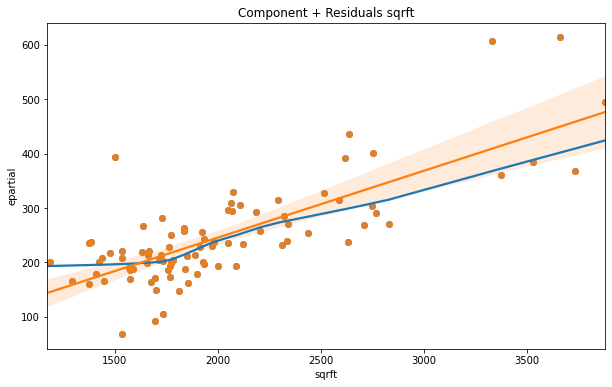

In [19]:
ccpr_plot(results2, house, "sqrft")

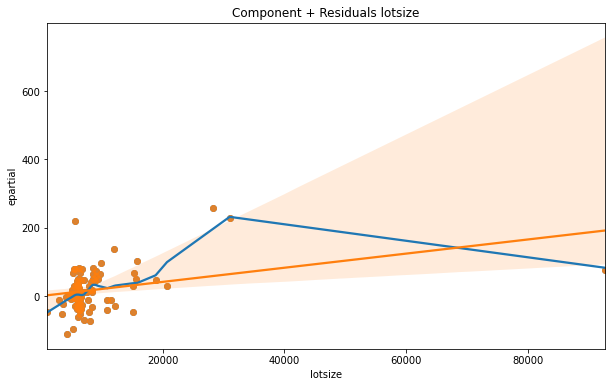

In [20]:
ccpr_plot(results2, house, "lotsize")

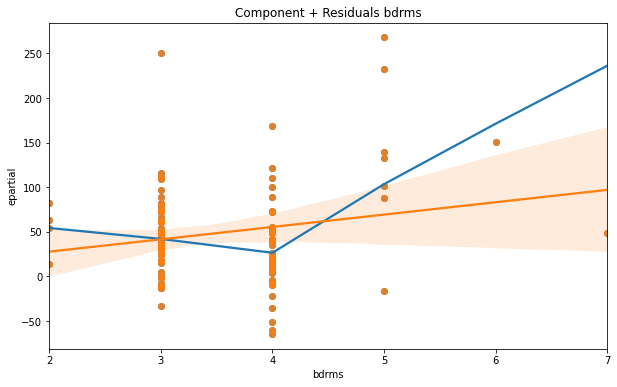

In [21]:
ccpr_plot(results2, house, "bdrms")

In [24]:
results2 = smf.ols('price ~ lotsize + I(lotsize**2) + sqrft+ I(sqrft**2) +bdrms', data = house).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     51.40
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           7.38e-24
Time:                        12:46:37   Log-Likelihood:                -469.53
No. Observations:                  88   AIC:                             951.1
Df Residuals:                      82   BIC:                             965.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.2832     74.586      0.486      0.628    -112.093     184.659
lotsize             0.0114      0.002      5.704      0.000       0.007       0.015
I(lotsize ** 2) -1.078e-07   2.19e-08     -4.932      0.000   -1.51e-07   -6.43e-08
sqrft               0.0178      0.062      0.288      0.774      -0.105       0.140
I(sqrft ** 2)    1.504e-05   1.28e-05      1.171      0.245   -1.05e-05    4.06e-05
bdrms              20.1927      7.961      2.536      0.013       4.355      36.030
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.352
Skew:                           0.640   Prob(JB):                     3.12e-06
Kurtosis:                       5.297   Cond. No.                     1.25e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""